# The Birthday Paradox

**Raf Ledeganck** <br>
29 NOV 2023

*Syntra Data Science 2022-2023*

<br>

***What is the 'Birthday Paradox' ?***

> In a room of just 23 people there’s a 50-50 chance of at least two people having the same birthday. In a room of 75 there’s a 99.9% chance of at least two people matching.

## Required packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

In [2]:
with open("birthdays_all.csv") as file_name:
    file_contents = np.loadtxt(file_name, dtype='str', skiprows=1)

## Functions

In [3]:
def generate_dates(no_of_dates):
    """Generate arbitrary birthdays with max. age = 100Y from today
    
    Parameters:
    - no_of_dates: Number of birthdays to be generated ; int
        
    Returns:
    - Dates in format DD/MM ; array(:,1)
    
    """
    #Reserve empty array in memory
    dates = np.full(no_of_dates, '00/00')

    #Generate random dates between today and 100Y back (rounded to 365 days/year)
    for i in range(0, no_of_dates):
        max_age = 100 * 365
        random_days = random.randint(0,max_age)
        random_date = datetime.datetime.today() - datetime.timedelta(days=random_days)
        dates[i] = str(random_date.day) + '/' + str(random_date.month)

    return(dates)

In [4]:
def prep_dates(file, option):
    """Trim dates as specified by option
    
    Parameters:
    - file: Dates in format DD/MM/YYYY ; array(:,1)
    - option = 'days': separate DD from DD/MM/YYYY
               'months': separate MM from DD/MM/YYYY
               'dates': separate DD/MM from DD/MM/YYYY
        
    Returns:
    - Trimmed dates ; array(:,1)
    
    """
    #Reserve empty array in memory
    if option == 'days' or option == 'months':
        dates = np.zeros(len(file), dtype=int)
    elif option == 'dates':
        dates = np.full(len(file), '00/00')
    
    #Fill array
    i = 0
    if option == 'days':
        for i in range(0,len(file)):
            dates[i] = file[i].split('/')[0]
    elif option == 'months':
        for i in range(0,len(file)):
            dates[i] = file[i].split('/')[1]
    elif option == 'dates':
        for i in range(0,len(file)):
            dates[i] = file[i].split('/')[0] + '/' + file[i].split('/')[1]

    return(dates)

In [5]:
def find_duplicates(array):
    """Check if there are duplicates in an array
    
    Parameters:
    - array: Values among which to search for duplicate; array(:,1)
        
    Returns:
    - List with number of duplicates
    
    """
    sorted_array = np.sort(array)
    duplicates = list()
    for i in range(1, len(array)):
        if sorted_array[i] == sorted_array[i-1]:
            duplicates.append(sorted_array[i])
    return(duplicates)

In [6]:
def draw_samples(array, no_of_samples=1, sample_size=1):
    """Calculate how many duplicates can be found when drawing samples from an array
    
    Parameters:
    - array: Values among which to search for duplicates; array(:,1)
    - no_of_samples: Number of samples to be drawn ; int
    - sample_size: Number of values in a single draw ; int
        
    Returns:
    - List with number of duplicates for the draws in which there were duplicates
    
    """
    list_of_duplicates = list()
    for i in range(0, no_of_samples):
        draw = np.random.choice(array, size=sample_size, replace=False)
        duplicates = find_duplicates(draw)
        no_of_duplicates = len(duplicates)
        if no_of_duplicates != 0:
            list_of_duplicates.append(no_of_duplicates)
    return(list_of_duplicates)

In [7]:
def calc_chance_by_sample_size(array, draws=10, max_sample=25):
    """Calculate how many duplicates can be found when drawing samples from an array
    
    Parameters:
    - array: Values among which to search for duplicates; array(:,1)
    - draws: Number of samples to be drawn ; int
    - max_sample_size: Number of values in a single draw ; int
        
    Returns:
    - Array with % of duplicates by number of draws ; array(:,1)
      Index in array corresponds with the size of the samples drawn.
    
    """
    #Generate empty array
    chance_per_sample_size = np.zeros(max_sample)
    
    for i in range(0, max_sample):
        #DRAW_SAMPLES returns array with a cell for each draw in which there was at least 1 duplicate
        #LEN(DRAW_SAMPLES) therefore returns the number of draws with at least 1 duplicate
        #division by DRAWS gives % of draws with duplicate
        #index in CHANCE_PER_SAMPLE_SIZE corresponds with size of draws
        chance_per_sample_size[i] = len(draw_samples(array, no_of_samples=draws, sample_size=i))/draws
    
    return(chance_per_sample_size)

In [8]:
def calculate_chance(sample_size):
    """Calculate the chance related to the birthday paradox
    
    Parameters:
    - sample_size: Number of values in a draw ; int
        
    Returns:
    - Chance of finding the same birthday in the given sample size ; float
    
    """
    power = sample_size * ( (sample_size - 1)/2)
    return(1 - ( (364/365) **power ) )

## The theory

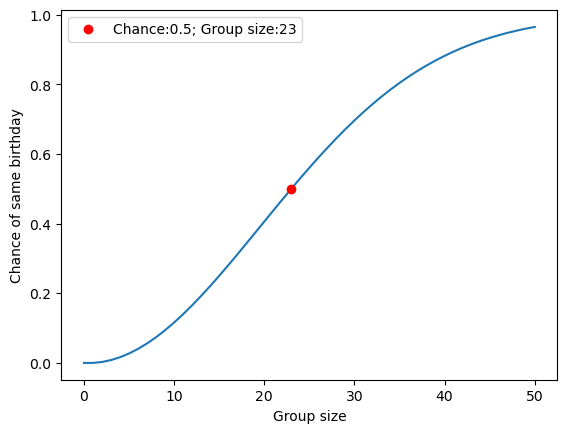

In [9]:
mark_pct=0.5
max_sample = 50

#Generate empty array
calc_chance_per_sample_size = np.zeros(max_sample + 1)
for i in range(0, max_sample + 1):
    calc_chance_per_sample_size[i] = calculate_chance(i)

diff_array = np.absolute(calc_chance_per_sample_size - mark_pct)
diff_min = diff_array.argmin()
legend_for_marker = 'Chance:' + str(mark_pct) + '; Group size:' + str(diff_min)

plt.plot(calc_chance_per_sample_size)
plt.xlabel('Group size')
plt.ylabel('Chance of same birthday')

plt.plot(diff_min, mark_pct, 'ro', label=legend_for_marker)
plt.legend(loc='best')
plt.show()

## Verifying the paradox

### Simulation with a file of actual birth dates

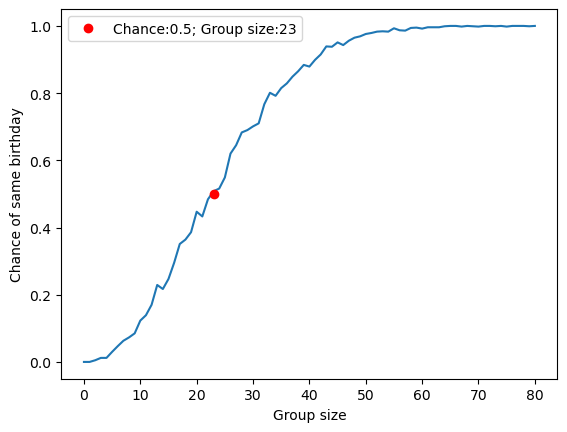

In [11]:
with open("birthdays_all.csv") as file_name:
    file_contents = np.loadtxt(file_name, dtype='str', skiprows=1)

imp_dates = prep_dates(file_contents, 'dates')

no_of_samples = 10**3
max_sample_size = 80
mark_pct=0.5

chance_per_sample_size = calc_chance_by_sample_size(imp_dates, draws=no_of_samples, max_sample=max_sample_size+1)

diff_array = np.absolute(chance_per_sample_size - mark_pct)
diff_min = diff_array.argmin()

legend_for_marker = 'Chance:' + str(mark_pct) + '; Group size:' + str(diff_min)

plt.plot(chance_per_sample_size)
plt.xlabel('Group size')
plt.ylabel('Chance of same birthday')

plt.plot(diff_min, mark_pct, 'ro', label=legend_for_marker)
plt.legend(loc='best')
plt.show()

### Actual vs. generated data

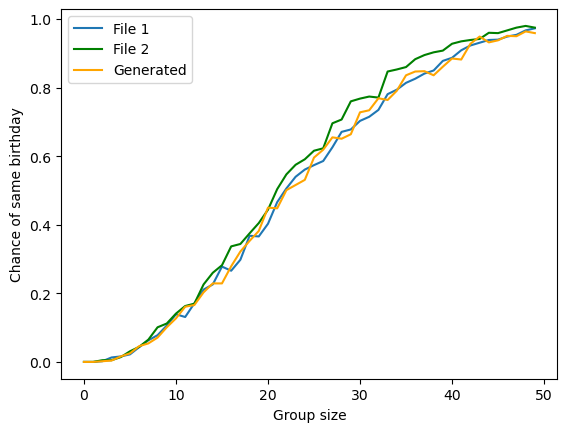

In [12]:
with open("birthdays_all.csv") as file_name:
    file_1 = np.loadtxt(file_name, dtype='str', skiprows=1)
with open("birthdays_fam.csv") as file_name:
    file_2 = np.loadtxt(file_name, dtype='str', skiprows=1)

no_of_samples = 10**3
max_sample_size = 50

dates_1 = prep_dates(file_1, 'dates')
dates_2 = prep_dates(file_2, 'dates')
dates_gen = generate_dates(no_of_samples)

graph1 = calc_chance_by_sample_size(dates_1, draws=no_of_samples, max_sample=max_sample_size)
graph2 = calc_chance_by_sample_size(dates_2, draws=no_of_samples, max_sample=max_sample_size)
graph3 = calc_chance_by_sample_size(dates_gen, draws=no_of_samples, max_sample=max_sample_size)

plt.plot(graph1, label='File 1')
plt.plot(graph2, color='green', label='File 2')
plt.plot(graph3, color='orange', label='Generated')
plt.xlabel('Group size')
plt.ylabel('Chance of same birthday')
plt.legend()
plt.show()

## Check months & days of month

The chance graphs of the actual birthdays and the generated dates are close together even though the months and the dates of the month are significantly unevenly spread.

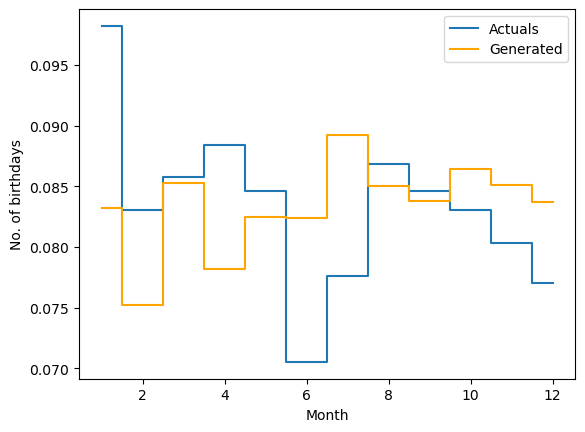

In [25]:
with open("birthdays_all.csv") as file_name:
    file_contents = np.loadtxt(file_name, dtype='str', skiprows=1)
gen_dates = generate_dates(int(10**4))

months_act = prep_dates(file_contents, 'months')
months_gen = prep_dates(gen_dates, 'months')

plt.plot(np.array(np.unique(months_act, return_counts=True))[0,:], \
         np.array(np.unique(months_act, return_counts=True))[1,:]/len(months_act), \
         ds='steps-mid', label='Actuals')
plt.plot(np.array(np.unique(months_gen, return_counts=True))[0,:], \
         np.array(np.unique(months_gen, return_counts=True))[1,:]/len(months_gen), \
         color='orange', ds='steps-mid', label='Generated')

plt.xlabel('Month')
plt.ylabel('No. of birthdays')
plt.legend()
plt.show()

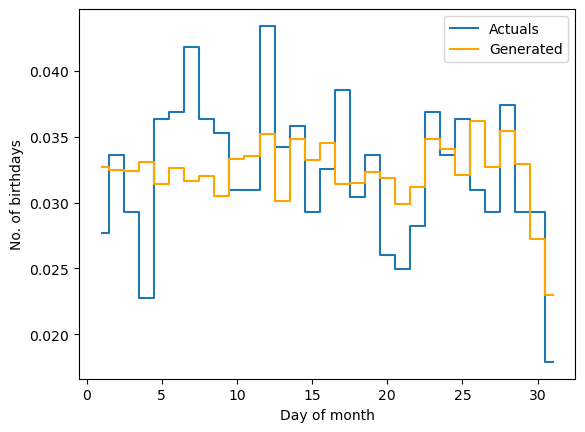

In [26]:
with open("birthdays_all.csv") as file_name:
    file_contents = np.loadtxt(file_name, dtype='str', skiprows=1)
gen_dates = generate_dates(int(10**4))

months_act = prep_dates(file_contents, 'days')
months_gen = prep_dates(gen_dates, 'days')

plt.plot(np.array(np.unique(months_act, return_counts=True))[0,:], \
         np.array(np.unique(months_act, return_counts=True))[1,:]/len(months_act), \
         ds='steps-mid', label='Actuals')
plt.plot(np.array(np.unique(months_gen, return_counts=True))[0,:], \
         np.array(np.unique(months_gen, return_counts=True))[1,:]/len(months_gen), \
         color='orange', ds='steps-mid', label='Generated')

plt.xlabel('Day of month')
plt.ylabel('No. of birthdays')
plt.legend()
plt.show()